In [ ]:
import numpy as np

# Intro to Statistics

In [ ]:
my_array = np.array([5, 10, 15, 20, 25])

In [ ]:
mean = np.mean(my_array)
mean

np.float64(15.0)

In [ ]:
k = [5, 10, 15, 20, 25]
k - 5

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
my_array - mean

array([-10.,  -5.,   0.,   5.,  10.])

In [ ]:
np.power([1, 2, 3], 3)

array([ 1,  8, 27])

In [ ]:
np.sum(my_array)

np.int64(75)

Подумаем, как можно адекватно описать разброс наших данных.

In [ ]:
ar1 = np.array([46, 47, 48, 49, 50, 51, 52, 53, 54]) #6.7 #2.6
ar2 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]) #666.7 #25.8
ar3 = np.array([10, 47, 48, 49, 50, 51, 52, 53, 90]) #358.7 #18.9

Сумма модулей либо квадратов отклонений каждого из значений от среднего как раз и будет адекватно описывать наш разброс.

In [ ]:
def get_dispersion(ar):
  m = np.mean(ar)
  dif_ces = ar - m
  print(dif_ces)
  squares = np.power(dif_ces, 2)
  print(squares)
  return np.sum(squares) / len(squares)

In [ ]:
d1 = get_dispersion(ar1)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
[16.  9.  4.  1.  0.  1.  4.  9. 16.]


In [ ]:
d1

np.float64(6.666666666666667)

In [ ]:
d2 = get_dispersion(ar2)

[-40. -30. -20. -10.   0.  10.  20.  30.  40.]
[1600.  900.  400.  100.    0.  100.  400.  900. 1600.]


In [ ]:
d2

np.float64(666.6666666666666)

In [ ]:
d3 = get_dispersion(ar3)

[-40.  -3.  -2.  -1.   0.   1.   2.   3.  40.]
[1.6e+03 9.0e+00 4.0e+00 1.0e+00 0.0e+00 1.0e+00 4.0e+00 9.0e+00 1.6e+03]


In [ ]:
d3

np.float64(358.6666666666667)

На практике обычно используют корень из дисперсии - так называемое стандартное отклонение.

In [ ]:
ar1.std()

np.float64(2.581988897471611)

In [ ]:
ar2.std()

np.float64(25.81988897471611)

In [ ]:
ar3.std()

np.float64(18.93849694845572)

# Задачи обработки естественного языка

токенизация, лемматизация

NLU - NER /word: P(NE), P(not NE)/, key words extraction /word: P(key), P(not key)/, sentiment analysis /P(positive), P(negative), P(neutral)/

NLG - summarization /P(W1|S)/, QA /P(W2|W1)/, machine translation /P(W1|S)/

КЛАССИФИКАТОР - ?

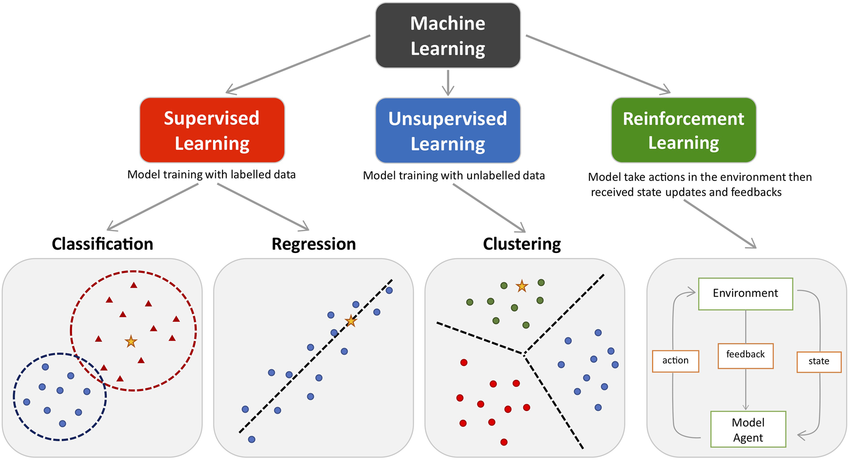

Пока что модели останутся для нас "черными ящиками", лезть в их устройство мы не будем.

# Задачи, сводящиеся к классификации

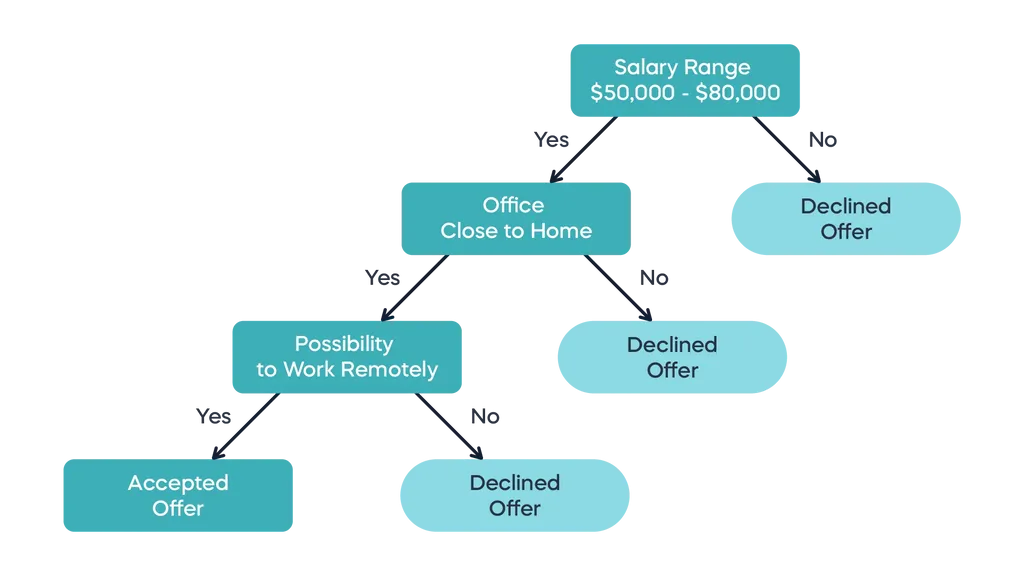

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [ ]:
import pandas as pd
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [ ]:
df1 = df1[50:]

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [ ]:
df['Species'].unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
x = df1.drop(columns=['Species', 'Id'])

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [ ]:
y = df1['Species']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
first_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=4, min_samples_leaf=1)
first_tree.fit(x, y)

DecisionTreeClassifier(max_depth=10, min_samples_split=4)

In [ ]:
from matplotlib import pyplot as plt

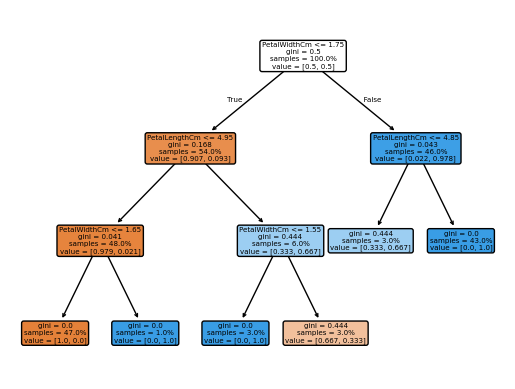

In [ ]:
from sklearn import tree
tree.plot_tree(first_tree, feature_names=x.columns, filled=True, proportion=True, rounded=True)
plt.show()

In [ ]:
y_pred = first_tree.predict(x)

In [ ]:
y_pred[:10]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [ ]:
y[:10]

,Species
50,Iris-versicolor
51,Iris-versicolor
52,Iris-versicolor
53,Iris-versicolor
54,Iris-versicolor
55,Iris-versicolor
56,Iris-versicolor
57,Iris-versicolor
58,Iris-versicolor
59,Iris-versicolor


In [ ]:
import numpy as np

In [ ]:
y_true = np.array(y)
y_true[:10]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

ACCURACY

In [ ]:
np.sum(y_true == y_pred)

np.int64(98)

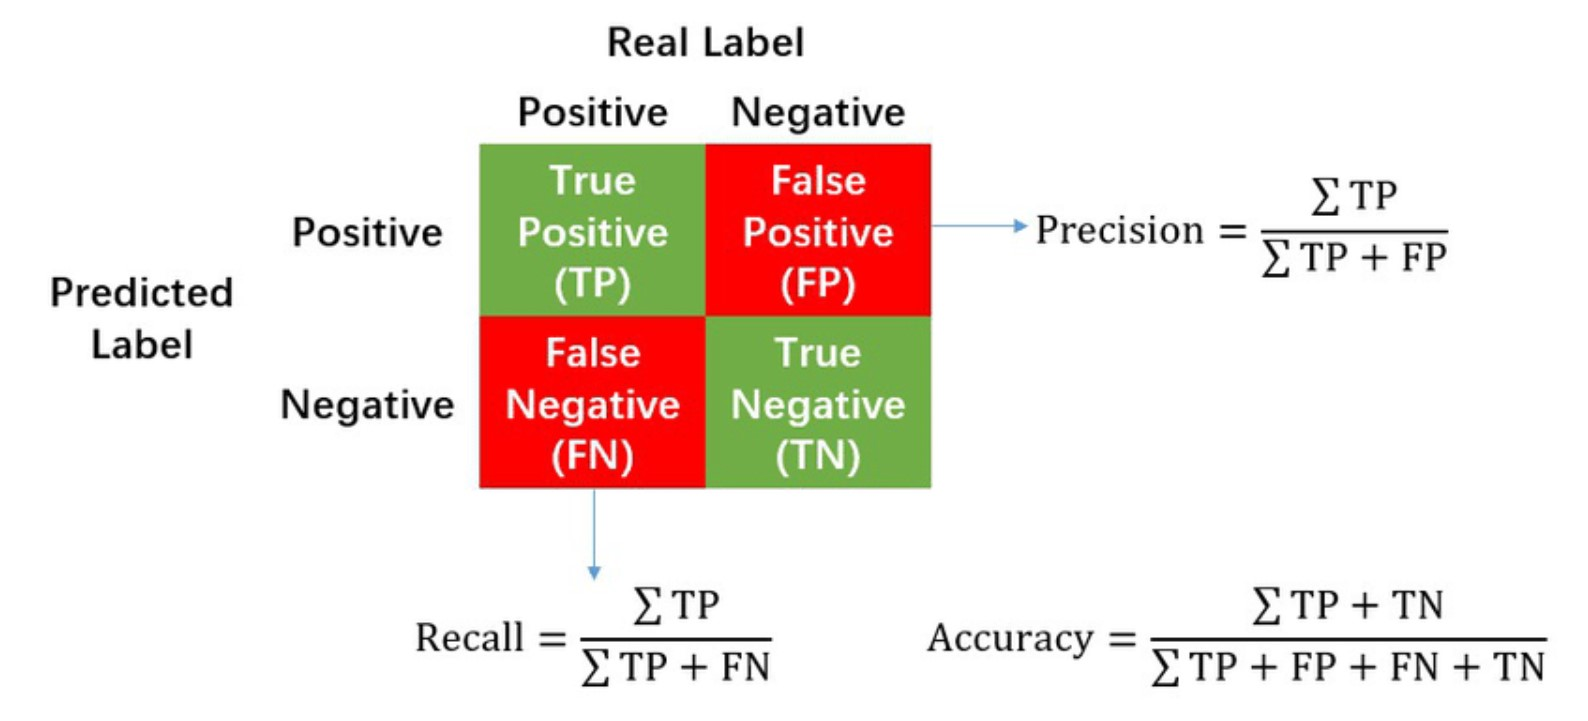

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_true, y_pred)

0.98

In [ ]:
metrics.recall_score(y, y_pred, pos_label='Iris-versicolor')

0.98

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[49,  1],
       [ 1, 49]])

# Задача регрессии

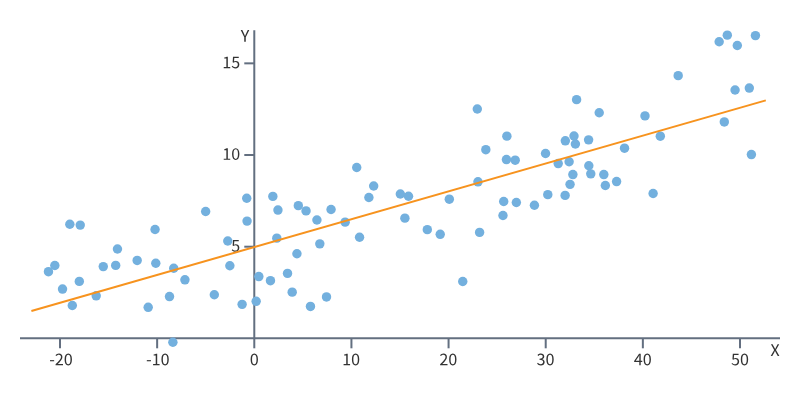

Задача регрессии сводится к поиску формулы, которая наиболее адекватно описывает некоторую закономерность в имеющихся данных с поправкой на шум.

В качестве одной из основных функций для определения ошибки используется средняя квадратичная ошибка.

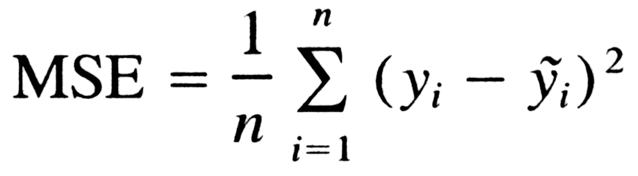

И пусть вас не пугает эта формула. Смысл здесь на самом деле довольно простой: мы считаем для каждого предсказания разницу с истинным значением, возводим в квадрат, потом все эти разницы складываем и делим на общее число предсказаний.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
from sklearn.linear_model import SGDRegressor, LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.drop(columns='median_house_value')

In [ ]:
y = df['median_house_value']

In [ ]:
reg1 = SGDRegressor()
reg1.fit(X, y)

SGDRegressor()

In [ ]:
y_pred_1 = reg1.predict(X)

In [ ]:
mean_squared_error(y, y_pred_1)

1.0507693463858219e+32

In [ ]:
reg2 = LinearRegression()
reg2.fit(X, y)

LinearRegression()

In [ ]:
y_pred = reg2.predict(X)

In [ ]:
mean_squared_error(y, y_pred)

4824523173.926901

# Практикум

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Задание 1. Удалить из таблицы лишние колонки (Id, Unnamed:32).

Разделить таблицу на фичи и целевую переменную (в нашем случае - диагноз).

In [ ]:
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

print(f"\nПервые 5 значений диагноза:\n{y.head()}")

Столбцы после удаления:
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Размер таблицы: (569, 31)

Фичи (X): (569, 30)
Целевая переменная (y): (569,)

Первые 5 значений диагноза:
0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


Задание 2. Посмотреть на описательную статистику по таблице. Найти переменные, у которых стандартное отклонение минимально и максимально (для этого вам нужно построить таблицу с описательной статистикой, взять строчку 'std' и использовать методы idxmin и idxmax). Воспроизвести для них боксплоты на графике.

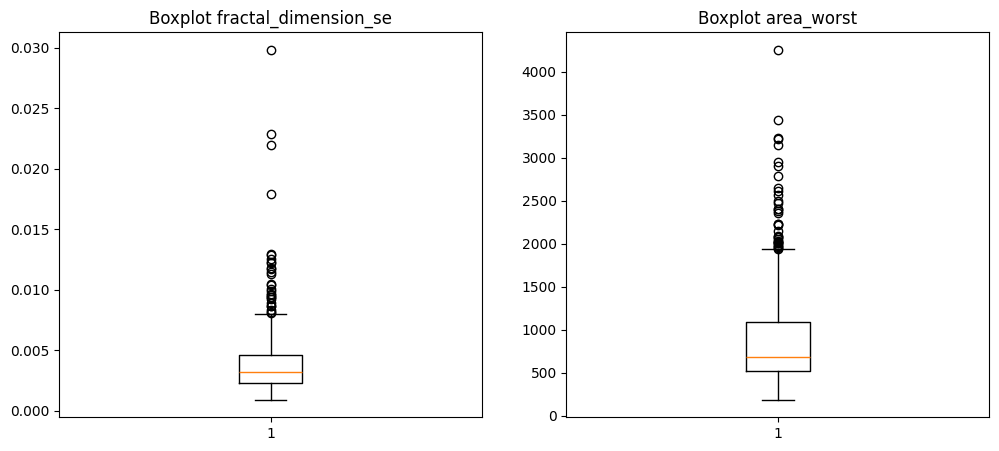

In [ ]:
stats = X.describe()
min_std_feature = stats.loc['std'].idxmin()
max_std_feature = stats.loc['std'].idxmax()

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.boxplot(X[min_std_feature])
ax1.set_title(f'Boxplot {min_std_feature}')
ax2.boxplot(X[max_std_feature])
ax2.set_title(f'Boxplot {max_std_feature}')
plt.show()


Как видим, переменные отличаются друг от друга на порядок. Строго говоря, для машинного обучения это проблема, но решать мы её на данном этапе не будем.

Задание 3. Обучить модель, которую мы использовали на занятии, на новых данных. Подсчитать accuracy. Вывести дерево на экран.

Accuracy: 1.0


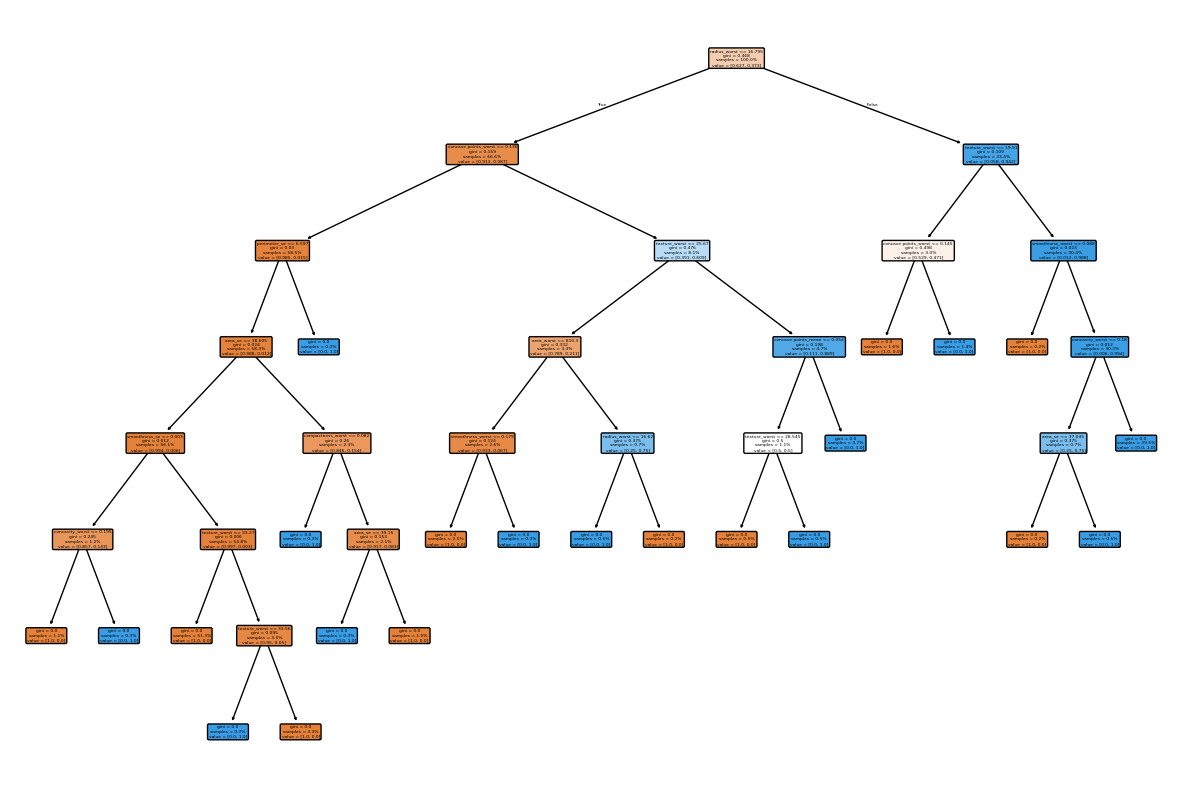

In [ ]:
# Задание 3
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=4, min_samples_leaf=1)
tree_model.fit(X, y)

y_pred = tree_model.predict(X)
accuracy = metrics.accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model, feature_names=X.columns, filled=True, proportion=True, rounded=True)
plt.show()

Мы видим, что алгоритму потребовалось максимум 7 ветвлений. За максимальное
количество ветвлений отвечает параметр max_depth. Создадим новое дерево решений, установим этот параметр равным 5, обучим его и подсчитаем accuracy.

In [ ]:
tree_model_2 = DecisionTreeClassifier(max_depth=5, min_samples_split=4, min_samples_leaf=1)
tree_model_2.fit(X, y)

y_pred_2 = tree_model_2.predict(X)
accuracy_2 = metrics.accuracy_score(y, y_pred_2)
print(f'Accuracy: {accuracy_2}')


Accuracy: 0.9947275922671354


Как видим, общее качество модели упало не сильно.

Задание 4. Импортируем другую модель и также подсчитаем accuracy.

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
ridge_model = RidgeClassifier()
ridge_model.fit(X, y)

y_pred_ridge = ridge_model.predict(X)
accuracy_ridge = metrics.accuracy_score(y, y_pred_ridge)
print(f'Ridge Accuracy: {accuracy_ridge}')


Ridge Accuracy: 0.9595782073813708


Задание 5 (на повторение).
Реализуйте функцию, которая получает на вход строку и возвращает все цифры, которые в ней содержались, также в виде строки.

In [ ]:
def extract_digits(text):
    return ''.join([char for char in text if char.isdigit()])

result = extract_digits('abc123def456')
print(result)


123456


Задание 6 (на повторение). Реализуйте функцию, которая получает на вход две строки и определяет, содержатся ли во второй строке все символы, имеющиеся в первой. Если это условие выполняется, функция должна возвратить True, в противном случае - False.

Пример: 'bar', 'barack' - True

'abc', 'ball' - False

In [ ]:
def contains_all_chars(str1, str2):
    return all(char in str2 for char in str1)

result1 = contains_all_chars('bar', 'barack')
result2 = contains_all_chars('abc', 'ball')
print(result1)
print(result2)

True
False


Задание 7 (на повторение). Реализуйте функцию, которая получает на вход слово и переставляет в нем буквы так, чтобы сначала шли гласные буквы, а потом все остальные.

Пример: 'similarity' - 'iiaiysmlrt'

In [ ]:
def rearrange_vowels(word):
    vowels = 'aeiouy'
    vowels_part = ''.join([char for char in word if char in vowels])
    consonants_part = ''.join([char for char in word if char not in vowels])
    return vowels_part + consonants_part

result = rearrange_vowels('similarity')
print(result)


iiaiysmlrt
